This notebook is for testing code used to plot PV slices

In [1]:
#import packages
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.visualization.wcsaxes import WCSAxes
import astropy.units as u
import pvplot as pv

First, try to just make plots for a single source. Then create a function and wrap nicely

In [2]:
#define data locations
datadir = '/Users/adams/data/shield/slices'
agc = '124056'


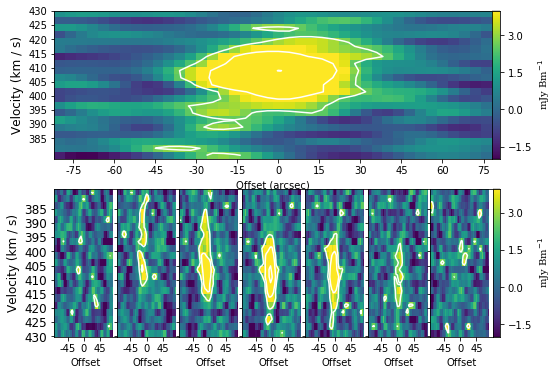

In [3]:
fig = pv.plot_major_minor(agc,datadir=datadir)

In [6]:
#Open a fits file to use the header for axes info
#starting with minor
f = fits.open('{0}/{1}.min1.fits'.format(datadir,agc))
hminor = f[0].header
f = fits.open('{0}/{1}.maj.fits'.format(datadir,agc))
hmajor = f[0].header
data = f[0].data
print(data.shape)

#print(hminor)

w = wcs.WCS(hminor,naxis=2)
w.wcs.print_contents()
print(w.wcs.name)
print(w)

print(hminor['NAXIS1'])
print(hminor['CDELT1'])

print(hminor['CDELT2'])
print(hmajor['CDELT2'])


(1, 21, 40)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'OFFSET'  'VRAD'  
CRVAL : 0.0  381513.8693646  
CRPIX : 20.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 4.000000257984  2493.620314187  
NAXIS : 40  21  1
40
4.000000257984
2493.620314187
2493.620314187


In [12]:
def get_offset_vals(header,sep=15*u.arcsec,headerunit = u.arcsec, 
                    naxis='NAXIS1', cdelt='CDELT1', crval = 'CRVAL1', crpix='CRPIX1'):
    """
    Take a header object and return an array of offset values
    Inputs:
        header: header object from astropy.fits
        sep (float, angular unit): separation for values in an angular unit
        headerunit (float, angular unit): Unit for header for offset axis
        naxis (str): naxis in header, default='NAXIS1'
        cdelt (str): cdelt in header, default='CDELT1'
    Outputs:
        offset_vals (nparray): Array of offset values (floats)
        offsetunit: Unit for separation values
    """
    total_offset = header[naxis] * header[cdelt] * headerunit
    print(total_offset)
    nticks = np.floor(total_offset / sep)
    print(nticks)
    #check if odd or not - want odd tick marks
    #if even, add 1 tick (since I did floor before)
    if nticks % 2 == 0:
        nticks = nticks + 1
    print(nticks)
    #set up array for values
    offset_vals = (np.arange(nticks) - np.floor(nticks/2)) * sep.value
    offsetunit = sep.unit

    #also get tick values that go with
    offset_ticks = (((offset_vals*offsetunit).to(headerunit) - header[crval]*headerunit) 
                    / (header[cdelt]*headerunit) + header[crpix])
    
    return offset_vals,offsetunit, offset_ticks
        

In [13]:
vals, unit, ticks = get_offset_vals(hminor)
print(vals)
print(ticks)

160.00001031936 arcsec
10.0
11.0
[-75. -60. -45. -30. -15.   0.  15.  30.  45.  60.  75.]
[ 1.25000121  5.00000097  8.75000073 12.50000048 16.25000024 20.
 23.74999976 27.49999952 31.24999927 34.99999903 38.74999879]


In [14]:
def get_vel_vals(header,sep=5*u.km/u.s,headerunit = u.m / u.s, 
                    naxis='NAXIS2', cdelt='CDELT2', crval = 'CRVAL2', crpix='CRPIX2'):
    """
    Take a header object and return an array of velocity values
    Inputs:
        header: header object from astropy.fits
        sep (float, vel unit): separation for values in a velocity unit
        headerunit (float, vel unit): Unit for header for velocity axis
        naxis (str): naxis in header, default='NAXIS2'
        cdelt (str): cdelt in header, default='CDELT2'
        crval (str): cdelt in header, default='CRVAL2'
        crpix (str): crpix in header, default='CRPIX2'
    Outputs:
        vel_vals (nparray): Array of velocity values (floats)
        velunit: Unit for separation values
    """
    total_velocity = header[naxis] * header[cdelt] * headerunit
    print(total_velocity)
    nticks = np.floor( (total_velocity.to(sep.unit) / sep) )
    print(nticks)
    #set starting value, go up to nearest sep value
    #implicitly assuming crpix is 1. should probably add a check for this
    extra_over = ((header[crval]*headerunit).to(sep.unit).value % sep.value)
    extra_over = ((header[crval]*headerunit).to(sep.unit) % sep)
    startval = (header[crval]*headerunit).to(sep.unit) + (sep - extra_over)
    print(startval)
    #set up array for values
    vel_vals = (np.arange(nticks)) * sep.value + startval.value
    velunit = sep.unit
    
    #also get tick values that go with
    vel_ticks = (((vel_vals*velunit).to(headerunit) - header[crval]*headerunit) 
                    / (header[cdelt]*headerunit) + header[crpix])
    return vel_vals,velunit, vel_ticks

In [16]:
vals, unit, ticks = get_vel_vals(hminor)
print(vals)
print(ticks)

52366.026597927004 m / s
10.0
385.0 km / s
[385. 390. 395. 400. 405. 410. 415. 420. 425. 430.]
[ 2.39801983  4.40313663  6.40825344  8.41337024 10.41848705 12.42360386
 14.42872066 16.43383747 18.43895427 20.44407108]


In [ ]:
def get_tick_positions(header,offsetvals,velvals):
    """
    Use WCS and header to convert offsetvals, velvals to pixel coordiantes
    Inputs:
        header: header (astropy.fits)
        offsetvals (flt nparry): Array of offset values
    """
    

In [44]:
vals, unit, ticks = get_vel_vals(hminor)
print(vals)

52366.026597927004 m / s
10.0
385.0 km / s
[385. 390. 395. 400. 405. 410. 415. 420. 425. 430.]


In [20]:
vals, unit = get_offset_vals(hmajor)
print(vals,unit)

160.00001011132 arcsec
10.0
11.0
[-75. -60. -45. -30. -15.   0.  15.  30.  45.  60.  75.] arcsec


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
Set OBSGEO-B to    52.916916 from OBSGEO-[XYZ].
Set OBSGEO-H to        1.987 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


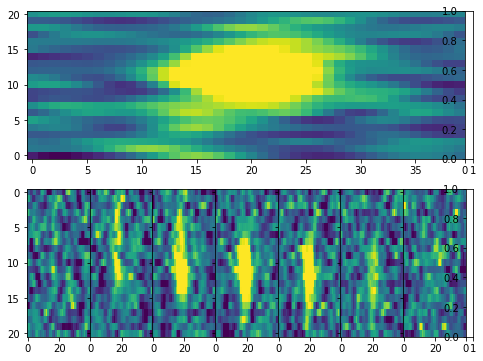

In [6]:
# initialize a figure instance
fig = plt.figure(figsize=(8,6))

#Open a fits file to use the header for axes info
#starting with minor
f = fits.open('{0}/{1}.min1.fits'.format(datadir,agc))
hminor = f[0].header
wcsminor = wcs.WCS(hminor,naxis=2) #ignore 3rd stokes axis
# initialize the physical grid for the plot
#7 slices
gridMinor = ImageGrid(fig, 212, (1,7), #ngrids=7,
                      cbar_mode="single", cbar_location='right',
                      cbar_size='12%', axes_pad=0.0,
                      #axes_class=(WCSAxes, dict(wcs=wcsminor)),
                      aspect=False, label_mode='L',share_all=True)

f = fits.open('{0}/{1}.maj.fits'.format(datadir,agc))
hmajor = f[0].header
wcsmajor = wcs.WCS(hmajor,naxis=2)
# and its grid and cosmetcs
gridMajor = ImageGrid(fig, 211, (1,1), #ngrids=1,
                      direction='column', cbar_mode="single",
                      cbar_location='right', cbar_size='2%',
                      axes_pad=0.0, 
                      #axes_class=(WCSAxes, dict(wcs=wcsmajor)),
                      aspect=False, share_all=True, label_mode='L')


#fix intensity range for everything
vmin = 0.0
vmax = 3
vmin=-2
vmax=4


# loop over all the minor axis slices
for i in range(1,8):
    # open the file and headers
    #print('{0}/{1}.min{2}.fits'.format(datadir,agc,i))
    f = fits.open('{0}/{1}.min{2}.fits'.format(datadir,agc,i))
    #get rid of third axies, which is first. grr.
    #squeeze so don't hve to know where empty axis is
    h, d = f[0].header, np.squeeze(f[0].data)
    #get wcs
    w = wcs.WCS(h,naxis=2)
    #print(np.nanmin(d)*1000.,np.nanmax(d)*1000.)
    ax = gridMinor[(i-1)]

    # define some properties of the image
    im = ax.imshow(d * 1000, # mJy/bm
                   aspect = 'auto',
                   vmin=vmin, vmax=vmax)
                   #origin='lower', # put x-axis below plot
                   #vmax=vmax, vmin=vmin, # call the scale range set above
                   #aspect='auto') 
                
                
#plot major axis
f = fits.open('{0}/{1}.maj.fits'.format(datadir,agc))
h, d = f[0].header, np.squeeze(f[0].data)
ax = gridMajor[0]

    # define some properties of the image
im = ax.imshow(d * 1000, # mJy/bm
               origin='lower', # put x-axis below plot
               vmax=vmax, vmin=vmin, # call the scale range set above
               aspect='auto') 